In [125]:
import numpy as np
import pandas as pd

In [126]:
filename = 'Data_analysis_1256'

# Read data from csv file 
df_feat = pd.read_csv(filename)
df_feat = df_feat.drop(columns = ['Activity'])
df_keys = df_feat.keys()

In [127]:
print(df_keys)
len(df_keys)

Index(['Unnamed: 0', 'Participant', 'start_time', 'end_time', 'acc_count',
       'acc_mean', 'acc_std', 'acc_min', 'acc_25%', 'acc_50%', 'acc_75%',
       'acc_max', 'acc_eng', 'acc_entropy', 'acc_var', 'acc_skew', 'acc_kurt',
       'acc_mad', 'gyro_mean', 'gyro_std', 'gyro_min', 'gyro_25%', 'gyro_50%',
       'gyro_75%', 'gyro_max', 'gyro_eng', 'gyro_entropy', 'gyro_var',
       'gyro_skew', 'gyro_kurt', 'gyro_mad', 'gsr_mean', 'gsr_std',
       'gsr_mean.1', 'gsr_max', 'gsr_variance', 'gsr_skewness', 'gsr_kurtosis',
       'score_change'],
      dtype='object')


39

In [128]:
df = df_feat.copy()
df = df.dropna()

Xs = df[df_keys[5:38]]
y = df['score_change']

print(Xs)
print(y)

      acc_mean   acc_std   acc_min   acc_25%   acc_50%   acc_75%   acc_max  \
0     1.677633  0.124228  1.471612  1.555450  1.686079  1.807553  1.849584   
1     1.561390  0.100116  1.447000  1.473017  1.525655  1.644828  1.787044   
2     1.491932  0.033225  1.447000  1.472856  1.480417  1.498187  1.601962   
3     1.479398  0.011917  1.447000  1.472856  1.480417  1.486391  1.518047   
4     1.491377  0.010630  1.465458  1.482809  1.490994  1.501417  1.522399   
...        ...       ...       ...       ...       ...       ...       ...   
9639  1.601729  0.088580  1.501142  1.531028  1.566651  1.659167  1.799660   
9640  1.584692  0.055840  1.501142  1.532493  1.579270  1.626916  1.711292   
9641  1.634041  0.070983  1.502046  1.565519  1.651781  1.700418  1.747433   
9642  1.701175  0.045277  1.584833  1.675359  1.706349  1.731437  1.791962   
9643  1.727280  0.024522  1.678459  1.706349  1.721291  1.748514  1.791962   

          acc_eng  acc_entropy   acc_var  ...  gyro_skew  gyro_

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

components = []
accuracy = []
for i in range(1,18):
    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print('When there is ' + str(i) + ' components:')
    print(explained_variance)
    print(sum(explained_variance))
    components.append(i)
    accuracy.append(sum(explained_variance))

When there is 1 components:
[0.31055562]
0.31055561821019195
When there is 2 components:
[0.31055562 0.26767344]
0.5782290586847625
When there is 3 components:
[0.31055562 0.26767344 0.07406292]
0.652291979281312
When there is 4 components:
[0.31055562 0.26767344 0.07406292 0.06210695]
0.7143989334511525
When there is 5 components:
[0.31055562 0.26767344 0.07406292 0.06210695 0.06052052]
0.7749194509077079
When there is 6 components:
[0.31055562 0.26767344 0.07406292 0.06210695 0.06052052 0.03663542]
0.8115548695805347
When there is 7 components:
[0.31055562 0.26767344 0.07406292 0.06210695 0.06052052 0.03663542
 0.03635651]
0.8479113746871348
When there is 8 components:
[0.31055562 0.26767344 0.07406292 0.06210695 0.06052052 0.03663542
 0.03635651 0.02911981]
0.8770311847832282
When there is 9 components:
[0.31055562 0.26767344 0.07406292 0.06210695 0.06052052 0.03663542
 0.03635651 0.02911981 0.02579441]
0.9028255908239927
When there is 10 components:
[0.31055562 0.26767344 0.0740629

In [138]:
# We finally found that only use 16 features (a half of the all features) can retain 99% accuracy.
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 16)
X_train_1 = pca.fit_transform(X_train)
X_test_1 = pca.transform(X_test)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression().fit(X_train_1, y_train)

y_pred = reg.predict(X_test_1)

print(metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.09747881627765909
Mean Absolute Error: 0.5347509319905885
Mean Squared Error: 0.45194059821290966
Root Mean Squared Error: 0.672265273692543


In [140]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

-0.2064195722618276
[ 0.01184159 -0.01894584  0.01165425  0.02526903  0.03730497 -0.08163807
 -0.10867644 -0.04014408 -0.01223931 -0.12162335  0.06326785  0.05524069
 -0.05761221 -0.02989952  0.05544881  0.00839394]


In [141]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,0.000,-0.316333
1,1.179,-0.231954
2,-0.539,-0.206275
3,-0.718,-0.270857
4,-0.538,-0.629498
...,...,...
1924,-0.780,-0.006807
1925,-1.154,0.086525
1926,-0.198,-0.162263
1927,-1.077,-0.510163


In [142]:
# Test the best alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha' : [1e-10,1e-8,1e-4, 1e-2,0.1,0.5, 1, 5, 10]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train_1, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.4628525295920837


In [144]:


lasso = Lasso(alpha = 1e-4)
lasso.fit(X_train_1,y_train)

y_pred = lasso.predict(X_test_1)

print(metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.09744855980612721
Mean Absolute Error: 0.5347531228493224
Mean Squared Error: 0.45195574924547327
Root Mean Squared Error: 0.6722765422394814


In [150]:
from sklearn.linear_model import ElasticNet

model_enet = ElasticNet(alpha = 0.0001) # After test, this is the best alpha

model_enet.fit(X_train_1,y_train)

y_pred = model_enet.predict(X_test_1)

print(metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.097463218133237
Mean Absolute Error: 0.5347518234399785
Mean Squared Error: 0.4519484090375731
Root Mean Squared Error: 0.6722710829996877


In [157]:
print(components)
print(accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.31055561821019195, 0.5782290586847625, 0.652291979281312, 0.7143989334511525, 0.7749194509077079, 0.8115548695805347, 0.8479113746871348, 0.8770311847832282, 0.9028255908239927, 0.9253142902683962, 0.9463887271287468, 0.9599202216182976, 0.9725408509167839, 0.9793678192264095, 0.9858057549353011, 0.9904825561085426, 0.9938024734926831]


Text(0.5, 0, 'number of components')

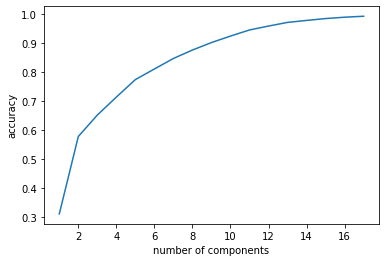

In [159]:
import matplotlib.pyplot as plt
plt.plot(components,accuracy)
plt.ylabel('accuracy')
plt.xlabel('number of components')